In [73]:
using Pkg

# Pkg.add("DataFrames")
Pkg.add("ResumableFunctions")

   Resolving package versions...
  No Changes to `C:\Users\hurub\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\hurub\.julia\environments\v1.8\Manifest.toml`


In [78]:
using CSV
using Plots
using DataFrames
using ResumableFunctions

using Flux

In [2]:
# smoothing a vector's values by applying moving average
function moving_average(data; window_size = 100)
    ma = []

    for i = 1 : size(data, 1)
        if i < window_size
            append!(ma, [sum(data[1:i]) / i])
        else
            append!(ma, [sum(data[i-window_size+1:i]) / window_size])
        end
    end

    ma
end

moving_average (generic function with 1 method)

In [36]:
parkinson_data = CSV.read("./filtered_data.csv", DataFrame)

parkinson_copy = deepcopy(parkinson_data)

;

In [37]:
window_size = 40

parkinson_copy[!, "AccV"]  = moving_average(parkinson_copy[!, "AccV"], window_size=window_size)
parkinson_copy[!, "AccML"] = moving_average(parkinson_copy[!, "AccML"], window_size=window_size)
parkinson_copy[!, "AccAP"] = moving_average(parkinson_copy[!, "AccAP"], window_size=window_size)

# parkinson_copy

;

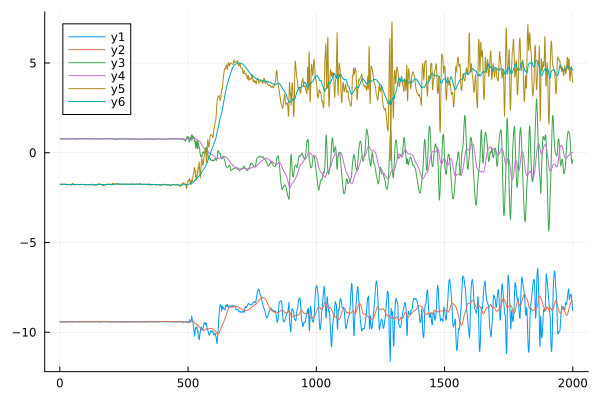

In [38]:
p = Plots.plot(collect(1:2000), parkinson_data[!, "AccV"][1:2000])
Plots.plot!(p, collect(1:2000), parkinson_copy[!, "AccV"][1:2000])

Plots.plot!(p, collect(1:2000), parkinson_data[!, "AccML"][1:2000])
Plots.plot!(p, collect(1:2000), parkinson_copy[!, "AccML"][1:2000])

Plots.plot!(p, collect(1:2000), parkinson_data[!, "AccAP"][1:2000])
Plots.plot!(p, collect(1:2000), parkinson_copy[!, "AccAP"][1:2000])

In [6]:
CSV.write("./smoothed_filtered_data.csv", parkinson_copy)

"./smoothed_filtered_data.csv"

In [79]:
labels = ["StartHesitation", "Turn", "Walking", "Normal"]

@resumable function data_loader(parkinson_dataframe, batch_size, labels)
    pdf = deepcopy(parkinson_dataframe)

    # AccV,AccML,AccAP
    for i in 1:size(parkinson_dataframe, 1)
        x = hcat(
            pdf[!, "AccV"][i:i+batch_size],
            pdf[!, "AccML"][i:i+batch_size],
            pdf[!, "AccAP"][i:i+batch_size]
        )
    
        y = Flux.onehotbatch(pdf[!, "event"][i:i+batch_size], labels)
        
        @yield x, y
    end
end

data_loader (generic function with 2 methods)